# 전처리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [4]:
train_data = pd.read_csv('C:/localRepository/recipes_project/data/content_data.csv')
train_data.tail()

,url,title,ingredient
25014,6881127,팽드깡파뉴,"['[재료]', '강력분', '250g', '통밀가루', '50g', '소금', '..."
25015,6881126,"치즈 웨지감자, 노오븐","['[재료외]', '감자', '3개', '식용유', '넉넉히', '파슬리가루', '..."
25016,6881123,크리스마스 트리를 꼭 닮은 녹차딸기크레이프케이크♥,"['[크레이프반죽 재료]', '박력분', '200g', '녹차파우더', '15g',..."
25017,6881120,맛있는 연말 홈파티 메뉴는 바로! 한우볼&양송이한우구이♥,"['[필수 재료]', '소고기다짐육', '150g', '메추리알', '4개', '당..."
25018,6881119,"시금치나물 만드는법, 요즘시금치 맛있네요~","['[재료]', '시금치', '1봉', '굵은소금', '0.5T', '"


In [5]:
# 소금, 간장, 고추장 등 양념 재료 제거(주재료만 남김)
for i in range(len(train_data)):
  try:
    train_data['ingredient'][i] = train_data['ingredient'][i].split('[')[2]
  except:
    pass
train_data['ingredient'][147]

C:\Users\admin\AppData\Local\Temp\ipykernel_18132\2875202994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ingredient'][i] = train_data['ingredient'][i].split('[')[2]


"기본재료]', '양배추', '2줌', '양파', '1/2개', '피망', '1/2개', '다진마늘', '1/2스푼', '베이컨', '3줄', '"

In [6]:
# 전체 데이터 개수 확인
len(train_data)

25019

In [7]:
# 데이터 결측치 확인
train_data.isnull().values.any()

False

In [8]:
# 정규식을 이용해 재료에서 한국어를 제외한 것은 삭제함(영어, 특수문자, 숫자 등 삭제)
train_data['ingredient'] = train_data['ingredient'].str.replace("[^ㄱ-힣\s]","")
train_data.sample(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_18132\2139507863.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['ingredient'] = train_data['ingredient'].str.replace("[^ㄱ-힣\s]","")


,url,title,ingredient
1648,6985672,이색적인 음료 아샷추 만들기,재료 복숭아아이스티 개 카누 커피 개 물 얼음
8449,6978538,베이컨 감자 파스타 초르바,재료 올리브오일 적당량 파스타면 가닥 베이컨 통마늘 알 양파 개 감자 개 밀가루 ...
5652,6981473,남은 소스 활용한 청양날치알크림리조또 레시피,소스 재료 청양날치알크림파스타소스 적당량
3412,6983829,밥솥 초코 오트밀빵,재료 설탕 오트밀 코코아파우더 우유 베이킹소다 식용유 달걀 개 소금 아...
23918,6882329,[얌무진 레시피]부대찌개보다 더 쉽고 맛있잖아...? 부대덮밥 만들기,필수재료인분 비엔나 소시지 알 스팸 작은 캔 개 대파 체다치즈 장
12891,6973949,남은 떡국떡 활용법 겨울방학 아이간식 만들기 w. 떡국떡핫도그,재료 핫케익가루 우유 계란 개 비엔나소세지 개 떡국떡 줌
16640,6890457,요거트 아이스크림 만들기,재료 요거트 파우더 우유 생크림
2462,6984806,바지락 미역국 끓이는법 ! 남편의 생일국으로 준비한 조개미역국 만들기,바지락미역국 재료 미역 줌 바지락살 참기름 큰술 다시다 큰술 참치액젓 큰술 맛술
11242,6975646,간단한 반찬 애호박새우젓볶음 만들기 새우젓으로 감칠맛이 풍부!,재료 애호박 개 홍고추 개 양파 다진마늘 새우젓 들기름 볶은참깨 식용유
24736,6881434,김치 퀘사디아 만들기,재료 또띠아 장 돼지고기 파스타소스 적당량 양파 개 치즈 약간


In [9]:
# 불용어 정의
stopwords = ['재료','구매','약간','개','인분', '팩','마리', '컵', '조각', '묶음', '작은술', 
             '큰술', '장', '알', '줌','스푼', '꼬집', '뿌리', '숟가락', '샷', '적당량', 
             '대', '모', '잎', '종이컵', '줌', '조금', '봉','보조재료','양념재료','기타',
             '찹쌀풀','김치볶음','양념','지름','원형','호틀','성형용','매콤한','국물','맛내기'
             ,'양념장만들기','소고기밑간','양념탕수소스','조미료','양념소스재료','추가','필수',
             '우엉밑간', '우엉양념','필링', '깨소','캔']

In [10]:
# 정규식을 이용해 레시피 제목에서 특수문자 제거
train_data['title'] = train_data['title'].str.replace("[^a-zA-Z0-9ㄱ-힣\s]","")
train_data.sample(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_18132\3883489329.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace("[^a-zA-Z0-9ㄱ-힣\s]","")


,url,title,ingredient
18758,6888068,별미로 좋은 주꾸미 콩나물찜 만들기,재료 콩나물 주꾸미 매운고추 개 쪽파 뿌리 깨 물 참기름
22615,6883744,매생이굴떡국,재료 떡국떡 매생이 굴 파 뿌리 국간장 다진 마늘
18471,6888374,버섯 카레라이스 카레밥 한그릇요리,재료 느타리버섯 팩 양파 개 당근 조금 물 컵 카레 봉지 우유 컵 버터 스푼
16568,6890533,짭짤하고 맛있는 두부양념조림,재료 두부 소 모
14821,6892464,호박전,재료 애호박 개 식용유 적당량
22204,6884188,나물 비빔밥 명절음식 재활용,나물 비빕밥 재료 잡채 고사리 시금치 도라지나물 적당히 밥 공기 배추김치 컵 참치 ...
6867,6980165,오이지무침 꼬들꼬들 간단한 오이지무침 밑반찬 만들기,재료 오이지 개 다진파 큰술 다진마늘 큰술 통깨 큰술 매실청 큰술 참기름 큰술
21154,6885340,당면으로 쫄면 만들기새콤달콤한 비빔당면 비빔쫄면,재료 당면 상추 장 깻잎 장 양배추 장통크기 당근 작은 사이즈 개 오이 개 노란 ...
10743,6976156,편스토랑 박솔미의 바보닭 레시피,다시마 품은 닭찜 재료 자른 다시마 닭다리 개 무 개 양파 개 표고버섯 개 쪽파 ...
10675,6976227,반전매력의 끝판왕 아귀찜,재료 아귀 살 오만둥이 알 콩나물 미나리 줄기


In [ ]:
# !pip install konlpy

In [12]:
# Okt를 활용해 재료 데이터 토큰화 및 불용어 제거
from konlpy.tag import Okt

okt = Okt()
tokenized_data = []

for sentence in train_data['ingredient']:
  tokenized_sentence = okt.morphs(sentence) # 토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence)

In [13]:
# 토큰화된 데이터 저장
from IPython.utils.sysinfo import encoding
train_data['ingredient'] = tokenized_data
train_data.to_csv('./train_data.csv',index=False)

재료 최대 길이: 72
재료 평균 길이: 11.189855709660657


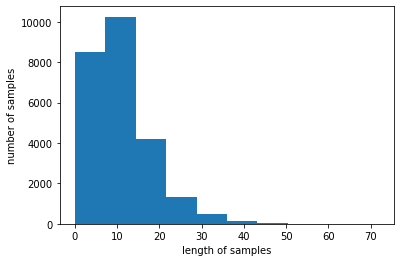

In [14]:
print('재료 최대 길이:',max(len(ingre) for ingre in tokenized_data))
print('재료 평균 길이:',sum(map(len,tokenized_data))/len(tokenized_data))
plt.hist([len(ingre) for ingre in tokenized_data])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# training word2Vec(자연어 학습)

In [ ]:
# !pip install gensim

In [16]:
# 토큰화 시킨 재료 데이터를 학습
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,vector_size=100,window=5,min_count=5,workers=4,sg=0)

In [18]:
# 학습한 데이터를 기반으로 '우유'와 유사한 단어 출력
print(model.wv.most_similar("우유"))

[('생크림', 0.9267284274101257), ('버터', 0.8872440457344055), ('노른자', 0.8451194167137146), ('연유', 0.8272503614425659), ('무염', 0.8244475722312927), ('두유', 0.8137437105178833), ('시나몬', 0.8102433681488037), ('핫케이크', 0.8080095648765564), ('이스트', 0.7940759062767029), ('드라이', 0.7914773225784302)]


# 영수증 이미지에서 글자 인식

In [ ]:
# !pip install easyocr

In [19]:
import re
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import tensorflow as tf

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


한국야구르트하루우유
3980
3980
서물저지방우유기획
3980
3980
7960


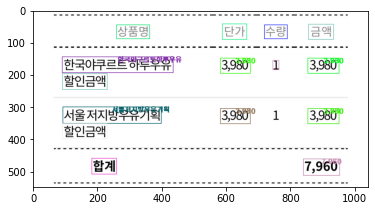

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


B75O바나나
2590
2590
참진토종닭백숙용
13980
13980
남양1000억프로바이오틱기획
3980
3980
신진로이즈백
7140
7140
10원공병(신)
7140
28290


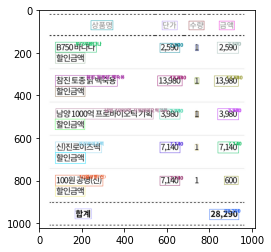

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


호주산냉동L식갈비
58800
58800
-10000
한우양지국거리(1++(9등급)
24310
24310
한국야구르트하루우유
3980
3980
87083


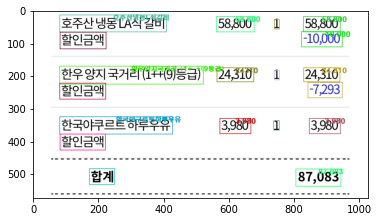

In [20]:
# 롯데 영수증 텍스트 인식
list_word = []
for a in range(1,4):
  reader = easyocr.Reader(['ko','en'])   # 영어, 한국어 언어 모델
  result = reader.readtext(f'C:/localRepository/recipes_project/paper/lotte_{a}.png')   # 이미지 텍스트화

  img    = cv2.imread(f'C:/localRepository/recipes_project/paper/lotte_{a}.png')

  img = Image.fromarray(img)
  font = ImageFont.truetype("C:/localRepository/recipes_project/HMKMRHD.TTF",20)
  draw = ImageDraw.Draw(img)

  np.random.seed(42)
  COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

  for i in result :
      x = i[0][0][0]
      y = i[0][0][1]
      w = i[0][1][0] - i[0][0][0]
      h = i[0][2][1] - i[0][1][1]
      
      color_idx = random.randint(0,255)
      color = [int(c) for c in COLORS[color_idx]]
      draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)


      if len(str(i[1])) > 4 :    # 할인금액 단어 제거
          ex_text = str(i[1])    # 반복문 돌아가는 타겟 단어 위치
          ex_text = ex_text.replace(',','')   # 금액에 있는 ,(콤마) 제거
          ex_text = ex_text.replace(' ','')   # 공백 제거

          draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)
          print(ex_text)
          list_word.append(ex_text)

      else:
          pass

  plt.imshow(img)
  plt.show()

In [21]:
# 추출된 텍스트 확인
list_word

['한국야구르트하루우유',
 '3980',
 '3980',
 '서물저지방우유기획',
 '3980',
 '3980',
 '7960',
 'B75O바나나',
 '2590',
 '2590',
 '참진토종닭백숙용',
 '13980',
 '13980',
 '남양1000억프로바이오틱기획',
 '3980',
 '3980',
 '신진로이즈백',
 '7140',
 '7140',
 '10원공병(신)',
 '7140',
 '28290',
 '호주산냉동L식갈비',
 '58800',
 '58800',
 '-10000',
 '한우양지국거리(1++(9등급)',
 '24310',
 '24310',
 '한국야구르트하루우유',
 '3980',
 '3980',
 '87083']

In [23]:
# 추출된 텍스트에서 한국어만 추출
list_tmp = []

for j in range(len(list_word)):
    p = re.compile('[가-힣]+')
    m = p.match(list_word[j])
    m
    if m:
        m = m.group()
        list_tmp.append(m)
    else:
        pass
list_tmp

['한국야구르트하루우유',
 '서물저지방우유기획',
 '참진토종닭백숙용',
 '남양',
 '신진로이즈백',
 '호주산냉동',
 '한우양지국거리',
 '한국야구르트하루우유']

In [24]:
# 리스트 안에 내용 중복 제거
list_tmp = list(set(list_tmp))
list_tmp

['신진로이즈백', '남양', '호주산냉동', '한우양지국거리', '한국야구르트하루우유', '참진토종닭백숙용', '서물저지방우유기획']

# 영수증에서 추출된 재료와 유사 단어 추출

In [25]:
# 영수증 상품 데이터 토큰화
okt = Okt()

tokenized_products = []

for sentence in list_tmp:
  tokenized_sentence = okt.morphs(sentence) # 토큰화
  tokenized_products.append(tokenized_sentence)
tokenized_products

[['신', '진로', '이즈', '백'],
 ['남양'],
 ['호주', '산', '냉동'],
 ['한', '우양', '지국', '거리'],
 ['한국', '야구르트', '하루', '우유'],
 ['참진', '토종', '닭백숙', '용'],
 ['서', '물', '저지방우유', '기획']]

In [ ]:
# 학습 데이터가 부족해서, 유사한 상품명이 제대로 나오지 않음
list_products = []

for h in range(len(tokenized_products)):
        for k in range(len(tokenized_products[h])):
            try:
                data = model.wv.most_similar(tokenized_products[h][k])

                result = {'original_words' : tokenized_products[h][k],
                            'smiliar_words' : data[0]}

                list_products.append(result)
            except:
                pass
print(list_products)

[{'original_words': '물', 'smiliar_words': ('생수', 0.7832306027412415)}, {'original_words': '신', 'smiliar_words': ('익은', 0.9339282512664795)}, {'original_words': '백', 'smiliar_words': ('태', 0.8736119866371155)}, {'original_words': '하루', 'smiliar_words': ('야', 0.9817461371421814)}, {'original_words': '우유', 'smiliar_words': ('생크림', 0.9085097312927246)}, {'original_words': '용', 'smiliar_words': ('시판', 0.8526561260223389)}, {'original_words': '산', 'smiliar_words': ('레디', 0.9781346321105957)}, {'original_words': '냉동', 'smiliar_words': ('칵테일', 0.8804609775543213)}, {'original_words': '한', 'smiliar_words': ('손질', 0.9048728942871094)}, {'original_words': '거리', 'smiliar_words': ('양지', 0.8656490445137024)}]


In [ ]:
# 위의 문제를 해결하기 위해 임의로 상품명을 임의로 지정함

products = {'우유':['한국야구르트하루우유', '서물저지방우유기획'],
            '양지':'한우양지국거리',
            '토종닭' : '참진토종닭백숙용',
            '갈비' : '호주산냉동'
            }

In [ ]:
# 상품명과 가장 유사한 단어를 묶어 저장함
# (우유,생크림), (양지, 쇠고기), (토종닭,광어), (갈비,등)
a = list(products.keys())
list_d = []

for b in range(len(a)):
  c = a[b]
  d = model.wv.most_similar(c)[0]

  result = {'main_key' :c,
            'sub_key' : d}
  
  list_d.append(result)
 
  print(c)
  print(d)

우유
('생크림', 0.9085097312927246)
양지
('쇠고기', 0.9310585856437683)
토종닭
('광어', 0.9751885533332825)
갈비
('등', 0.9731990098953247)


In [ ]:
print(list_d)
len(list_d)

[{'main_key': '우유', 'sub_key': ('생크림', 0.9085097312927246)}, {'main_key': '양지', 'sub_key': ('쇠고기', 0.9310585856437683)}, {'main_key': '토종닭', 'sub_key': ('광어', 0.9751885533332825)}, {'main_key': '갈비', 'sub_key': ('등', 0.9731990098953247)}]


4

In [ ]:
# qtpy에서 사용하기 위한 key 저장
list_A = []

for A in range(len(list_d)):
    ori_A = list_d[A]['key']
    list_A.append(ori_A)

list_A

# url 키워드 넣어서 링크 긁어오기

In [ ]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
from selenium import webdriver

In [ ]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('C:/localRepository/recipes_project/chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_9480\2917809576.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/localRepository/Recipes_10,000/chromedriver.exe',options=options)


In [ ]:
#해당 url로 이동

final_url = []

url = f'https://www.10000recipe.com/recipe/list.html?q={list_d[0].values()}&query=&order=date'
wd.get(url)

req = wd.page_source
soup = BeautifulSoup(req, "html.parser")

for e in range(0,4):
    link_recipes = soup.find_all("li", class_ = "common_sp_list_li")[e]
    link_recipes = link_recipes.find("a")["href"]
    print(link_recipes)

    final_url.append(f'https://www.10000recipe.com/{link_recipes}')

/recipe/6987402
/recipe/6987378
/recipe/6976402
/recipe/6975930


In [ ]:
# 추출된 텍스트와 유사 단어를 이용해 검색과 해당 url 추출 가능한 것 확인 완료
final_url

['https://www.10000recipe.com//recipe/6987402',
 'https://www.10000recipe.com//recipe/6987378',
 'https://www.10000recipe.com//recipe/6976402',
 'https://www.10000recipe.com//recipe/6975930']

# QT Designer 이용한 시각화

In [39]:
# 커널 충돌 때문에 pyqt 파일 따로 생성
from csv import list_dialects
from os import link
from PyQt5.QtWidgets import *
from PyQt5 import uic
import sys
import requests
from bs4 import BeautifulSoup
import webbrowser
import os

recipes_ui = 'C:/localRepository/recipes_project/recipes.ui'


class MyWindow(QMainWindow):

    def __init__(self):
        QMainWindow.__init__(self, None)
        uic.loadUi(recipes_ui, self)

        self.pushButton.clicked.connect(self.pushButtonClicked)
        # self.lineEdit.textChanged.connect(self.line_changed)
        self.tblResult.itemSelectionChanged.connect(self.tblResultSelected)

        self.comboBox.addItems(list_A)
        self.comboBox.activated[str].connect(lambda :self.selectedComboItem(self.comboBox))
        self.pushButton.clicked.connect(self.selectedComboItem)

        self.show()

 
    def line_changed(self):
        pass
 
    def pushButtonClicked(self):

        url = f'https://www.10000recipe.com/recipe/list.html?q='
        keyword = self.comboBox.currentText()
        url_b = '&query=&order=date'
        
        result = requests.get(url + keyword + url_b)
        bs_obj = BeautifulSoup(result.content, 'html.parser')
        

        self.tblResult.setSelectionMode(QAbstractItemView.SingleSelection)
        self.tblResult.setColumnCount(2)
        self.tblResult.setRowCount(10) 
        self.tblResult.setHorizontalHeaderLabels(['레시피 이름', '레시피 링크'])
        self.tblResult.setColumnWidth(0,350)
        self.tblResult.setColumnWidth(1,250)
        self.tblResult.setEditTriggers(QAbstractItemView.NoEditTriggers) # read only

        ul = bs_obj.find('ul', class_='common_sp_list_ul ea4')
        lis = ul.find_all('li', class_='common_sp_list_li')

        list_title = []
        list_url = []

        for li in lis:
            title = li.find('div',class_= 'common_sp_caption_tit line2').get_text()
            list_title.append(title)

            url = li.find('div', class_='common_sp_thumb')
            url = url.find('a')['href']
            url = f'https://www.10000recipe.com/{url}'
            list_url.append(url)
  

        for i in range(len(list_title)):
            self.tblResult.setItem(i,0,QTableWidgetItem(list_title[i]))
            self.tblResult.setItem(i,1,QTableWidgetItem(list_url[i]))

    def tblResultSelected(self) -> None:
        selected = self.tblResult.currentRow() 
        link = self.tblResult.item(selected, 1).text()
        webbrowser.open(link)


    ### 콤보박스 관련 함수
    def selectedComboItem(self,text):
        # print(self.comboBox.currentText())
        pass


if __name__ == '__main__':

    app = QApplication(sys.argv)
    Dialog = MyWindow()
    Dialog.show()
    app.exec_()

: 

: 